This notebook needs an mzML file and a _box_ file from mzMine

- The _box_ file is a .csv produced by mzmine. It needs to have the min and max m/z and min and max rt (so the default GNPS .csv will not do)

In [4]:
mzml_file_path = '/Users/simon/clms_data/collision_energy_comparison/new.mzML'
box_file_path = '/Users/simon/clms_data/collision_energy_comparison/new_box.csv'

In [13]:
import sys
import os
import pylab as plt
%matplotlib inline
# path to pymzm repo
sys.path.append('/Users/simon/git/pymzm')

In [6]:
from ms2_matching import MZMLFile,load_picked_boxes,map_boxes_to_scans

Load the mzml file and the boxes

In [7]:
mzml_file_obj = MZMLFile(mzml_file_path)

boxes = load_picked_boxes(box_file_path)

Loaded 7422 scans


Call the method that maps boxes to scans

`half_isolation_width` is half of the isolation window. So, 0.5 = a window of plus and minus 0.5

In [8]:
s2b,b2s = map_boxes_to_scans(mzml_file_obj,boxes,half_isolation_window = 0.5)

We're looking for spectra that include the precursor in them.

The following code finds picked peaks that are covered by more than one MS2 scan in which the precursor also appears. I.e. there has to be >1 MS2 scan, and each of these scans has to have the precursor in it

In [9]:
all_info = {}
for box,scans in b2s.items():
    pmz = box.mz
    n_found = 0
    these = []
    for scan in scans:
        pp = scan.get_precursor(pmz,max_error = 20)
        intensity_in_previous_ms1 = scan.previous_ms1.get_precursor(pmz,max_error = 20)
        intensity_in_next_ms1 = scan.next_ms1.get_precursor(pmz,max_error = 20)
        if not pp is None and not intensity_in_previous_ms1 is None and not intensity_in_next_ms1 is None:
            rt_fac = (scan.rt_in_seconds - scan.previous_ms1.rt_in_seconds)/(scan.next_ms1.rt_in_seconds - scan.previous_ms1.rt_in_seconds)
            ms1_intensity_shift = intensity_in_next_ms1[1] - intensity_in_previous_ms1[1]
            ms1_intensity = intensity_in_previous_ms1[1] + rt_fac*ms1_intensity_shift
            these.append((pmz,scan.precursor_mz,pp[1],ms1_intensity))
    if len(these) > 1:
        all_info[box] = these

Can't find peak within 20 ppm, closest = 91.2358470553792
Can't find peak within 20 ppm, closest = 90.13739847185126
Can't find peak within 20 ppm, closest = 79.86367348473702
Can't find peak within 20 ppm, closest = 91.94660790354432
Can't find peak within 20 ppm, closest = 91.36507630050012
Can't find peak within 20 ppm, closest = 91.17123243281873
Can't find peak within 20 ppm, closest = 78.63599565608816
Can't find peak within 20 ppm, closest = 91.88199328098386
Can't find peak within 20 ppm, closest = 92.14045177122573
Can't find peak within 20 ppm, closest = 97.09748923852311
Can't find peak within 20 ppm, closest = 98.19573096643721
Can't find peak within 20 ppm, closest = 96.32225978352493
Can't find peak within 20 ppm, closest = 96.38686223810811
Can't find peak within 20 ppm, closest = 96.96828432935675
Can't find peak within 20 ppm, closest = 97.1620916931063
Can't find peak within 20 ppm, closest = 97.03288678393993
Can't find peak within 20 ppm, closest = 152533.3293540426

Can't find peak within 20 ppm, closest = 229.944590707944
Can't find peak within 20 ppm, closest = 45.0166694078778
Can't find peak within 20 ppm, closest = 42.46030632426741
Can't find peak within 20 ppm, closest = 45.876652810128
Can't find peak within 20 ppm, closest = 34.10245867135845
Can't find peak within 20 ppm, closest = 261.1232159523971
Can't find peak within 20 ppm, closest = 709.126054461416
Can't find peak within 20 ppm, closest = 31.91651998129956
Can't find peak within 20 ppm, closest = 124.71934145626082
Can't find peak within 20 ppm, closest = 90.13734177134126
Can't find peak within 20 ppm, closest = 46.75424280743216
Can't find peak within 20 ppm, closest = 185.00010632190018
Can't find peak within 20 ppm, closest = 165.08820524875975
Can't find peak within 20 ppm, closest = 166.20192951873062
Can't find peak within 20 ppm, closest = 83065.31962302496
Can't find peak within 20 ppm, closest = 166.8011502964825
Can't find peak within 20 ppm, closest = 172.921402171076

Can't find peak within 20 ppm, closest = 20432.572598287978
Can't find peak within 20 ppm, closest = 87.12306791703996
Can't find peak within 20 ppm, closest = 102.7380080464729
Can't find peak within 20 ppm, closest = 22.794995535311173
Can't find peak within 20 ppm, closest = 68.3334753991804
Can't find peak within 20 ppm, closest = 22.631145317002204
Can't find peak within 20 ppm, closest = 38.75196115925035
Can't find peak within 20 ppm, closest = 40.17803332991076
Can't find peak within 20 ppm, closest = 21.869344461353
Can't find peak within 20 ppm, closest = 37.1218103420915
Can't find peak within 20 ppm, closest = 34.42877393192299
Can't find peak within 20 ppm, closest = 41.60610791121638
Can't find peak within 20 ppm, closest = 31.06439862912921
Can't find peak within 20 ppm, closest = 35.7745240530405
Can't find peak within 20 ppm, closest = 21.553118989520613
Can't find peak within 20 ppm, closest = 42.42486969327869
Can't find peak within 20 ppm, closest = 48.1062205110103

Can't find peak within 20 ppm, closest = 47366.81116948395
Can't find peak within 20 ppm, closest = 108.15290023034807
Can't find peak within 20 ppm, closest = 9198.890676629902
Can't find peak within 20 ppm, closest = 33.40475588281612
Can't find peak within 20 ppm, closest = 71435.47126617104
Can't find peak within 20 ppm, closest = 109.74647575393851
Can't find peak within 20 ppm, closest = 106.63911093207668
Can't find peak within 20 ppm, closest = 58.18654334888645
Can't find peak within 20 ppm, closest = 84.33515189838603
Can't find peak within 20 ppm, closest = 86.33752282334771
Can't find peak within 20 ppm, closest = 21.011167719577653
Can't find peak within 20 ppm, closest = 47.90688617395348
Can't find peak within 20 ppm, closest = 49.813627912220284
Can't find peak within 20 ppm, closest = 122055.339156503
Can't find peak within 20 ppm, closest = 51.65136802337593
Can't find peak within 20 ppm, closest = 78182.41763179307
Can't find peak within 20 ppm, closest = 63.93216123

Can't find peak within 20 ppm, closest = 256536.28399122134
Can't find peak within 20 ppm, closest = 50151.919340064975
Can't find peak within 20 ppm, closest = 444068.24108594185
Can't find peak within 20 ppm, closest = 123167.8439154204
Can't find peak within 20 ppm, closest = 42257.88833236743
Can't find peak within 20 ppm, closest = 293907.36796664307
Can't find peak within 20 ppm, closest = 280295.8034823114
Can't find peak within 20 ppm, closest = 40091.637396863174
Can't find peak within 20 ppm, closest = 40087.88013540286
Can't find peak within 20 ppm, closest = 24659.791025537885
Can't find peak within 20 ppm, closest = 40091.85841224319
Can't find peak within 20 ppm, closest = 40091.85841224319
Can't find peak within 20 ppm, closest = 40086.99607388279
Can't find peak within 20 ppm, closest = 40086.55404312276
Can't find peak within 20 ppm, closest = 40087.990643092875
Can't find peak within 20 ppm, closest = 40085.55947391267
Can't find peak within 20 ppm, closest = 314261.0

Can't find peak within 20 ppm, closest = 855.9567781718484
Can't find peak within 20 ppm, closest = 855.8753670268825
Can't find peak within 20 ppm, closest = 860.271568855043
Can't find peak within 20 ppm, closest = 486614.2745667559
Can't find peak within 20 ppm, closest = 66.5064242518699
Can't find peak within 20 ppm, closest = 1100.373379154989
Can't find peak within 20 ppm, closest = 1038.438288878038
Can't find peak within 20 ppm, closest = 958.8159631427378
Can't find peak within 20 ppm, closest = 896.8896306003493
Can't find peak within 20 ppm, closest = 140.99839233592715
Can't find peak within 20 ppm, closest = 409735.0962735218
Can't find peak within 20 ppm, closest = 168.85003703055983
Can't find peak within 20 ppm, closest = 1001.7517219930297
Can't find peak within 20 ppm, closest = 999.5792208267396
Can't find peak within 20 ppm, closest = 1123.4344329188061
Can't find peak within 20 ppm, closest = 73017.69313417413
Can't find peak within 20 ppm, closest = 101687.626542

Can't find peak within 20 ppm, closest = 1098.398921098017
Can't find peak within 20 ppm, closest = 1098.0418343226274
Can't find peak within 20 ppm, closest = 1097.5062041595431
Can't find peak within 20 ppm, closest = 1031.534422406338
Can't find peak within 20 ppm, closest = 1097.3276607718485
Can't find peak within 20 ppm, closest = 1071.2516991861578
Can't find peak within 20 ppm, closest = 1412.4527521735108
Can't find peak within 20 ppm, closest = 1412.9189081973304
Can't find peak within 20 ppm, closest = 1411.2873621139615
Can't find peak within 20 ppm, closest = 1412.8023691913754
Can't find peak within 20 ppm, closest = 1243.3546545329361
Can't find peak within 20 ppm, closest = 1412.4527521735108
Can't find peak within 20 ppm, closest = 1411.5204401258713
Can't find peak within 20 ppm, closest = 190.30819672436823
Can't find peak within 20 ppm, closest = 1412.219674161601
Can't find peak within 20 ppm, closest = 1413.0354472032852
Can't find peak within 20 ppm, closest = 14

Can't find peak within 20 ppm, closest = 531706.1785714409
Can't find peak within 20 ppm, closest = 26439.65046554194
Can't find peak within 20 ppm, closest = 106077.39632617179
Can't find peak within 20 ppm, closest = 624157.547513386
Can't find peak within 20 ppm, closest = 25878.063238229566
Can't find peak within 20 ppm, closest = 346221.2768308644
Can't find peak within 20 ppm, closest = 590.9401588972428
Can't find peak within 20 ppm, closest = 43378.61215363272
Can't find peak within 20 ppm, closest = 12129.340881117318
Can't find peak within 20 ppm, closest = 67185.05461850487
Can't find peak within 20 ppm, closest = 300217.1995209574
Can't find peak within 20 ppm, closest = 29956.20173491067
Can't find peak within 20 ppm, closest = 549.7477478464803
Can't find peak within 20 ppm, closest = 68.43805855548776
Can't find peak within 20 ppm, closest = 293.2545621594244
Can't find peak within 20 ppm, closest = 68.869844413882
Can't find peak within 20 ppm, closest = 293.54241939835

Loop over all of these that were found and compute `z`, the ratio of precursor in MS1 to precursor in MS2 for the spectrum that is centered on the peak.

Then for other MS2 spectra, compute the ratio, correcting for `z`

In [15]:
mz_err = 1e-6
import numpy as np
boxz = {}
points = []
for box, these in all_info.items():
    mz_diff = [abs(t[1]-t[0]) for t in these]
    mm = np.argsort(mz_diff)
    if mz_diff[mm[0]] < mz_err:
        z = these[mm[0]][2]/these[mm[0]][3]
        boxz[box] = z
        for pos in mm[1:]:
            rat = these[pos][2]/(these[pos][3]*z)
            points.append((rat,abs(these[pos][0]-these[pos][1])))

Plot a histogram of the `z` values. Should be less than 1. Otherwise, the precursor in the MS2 spectrum is more intense than it is in the MS1.

(array([ 9., 14., 30., 41., 39., 14.,  4.,  0.,  0.,  1.]),
 array([-4.34322045, -3.50562301, -2.66802556, -1.83042812, -0.99283068,
        -0.15523324,  0.6823642 ,  1.51996165,  2.35755909,  3.19515653,
         4.03275397]),
 <a list of 10 Patch objects>)

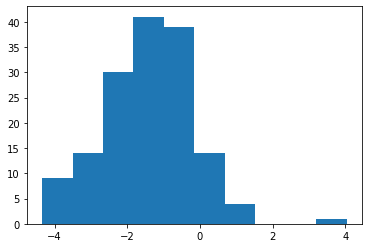

In [17]:
plt.hist([np.log(a) for a in list(boxz.values())])

Plot the ratio as a function of the difference between the peak m/z and the precusor m/z of the MS2 spectrum

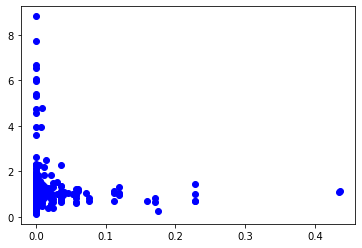

In [19]:
r,m = zip(*points)
plt.plot(m,r,'bo')
